<a href="https://colab.research.google.com/github/thiagoteles10/vendas_games/blob/main/projeto_vendas_jogos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Etapa 1 - Entendimento do problema

## Etapa 2 - coleta de dados

Onde eu vou conseguir os dados para responder essas perguntas? quais são as formas?

https://www.kaggle.com/datasets/gregorut/videogamesales

In [2]:
df = pd.read_csv("vendas_games.csv")

## Etapa 3 - Análise exploratória dos dados

Agora nós vamos analisar os dados, entender tudo que é importante para responder nossa pergunta.

In [3]:
import pandas as pd
import numpy as np

# visualização de dados

import missingno
import seaborn as sns
import matplotlib.pyplot as plt

# calculos estatísticos

from scipy import stats




In [4]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
df.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
rows, columns = df.shape

In [8]:
print(f'rows: {rows}')

rows: 16598


In [9]:
print(f'columns: {columns}')

columns: 11


## Dicionário de dados

About Dataset
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales

In [10]:
df.describe().round(2)

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [11]:
df.describe(include='all')

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16598,16598,16327.000000,16598,16540,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
unique,NaN,11493,31,NaN,12,578,NaN,NaN,NaN,NaN,NaN
top,NaN,Need for Speed: Most Wanted,DS,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,2163,NaN,3316,1351,NaN,NaN,NaN,NaN,NaN
mean,8300.605254,NaN,NaN,2006.406443,NaN,NaN,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,NaN,NaN,5.828981,NaN,NaN,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.040000,0.470000


## Dados faltantes

In [12]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

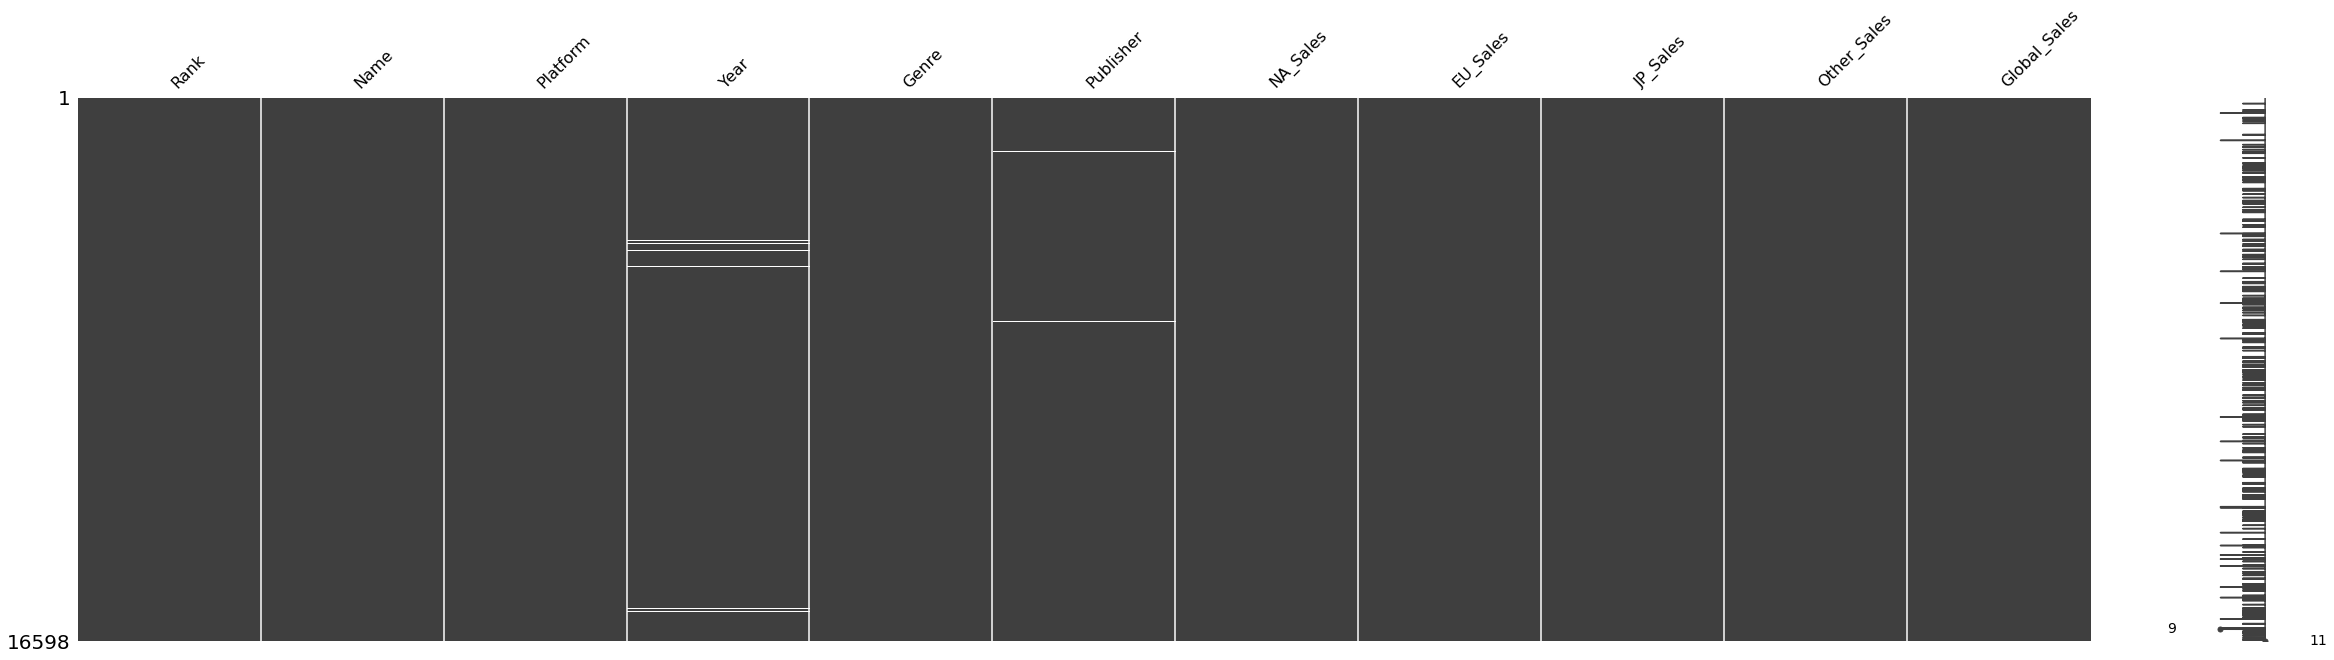

In [13]:
missingno.matrix(df,figsize=(40,10))

In [14]:
percentual_nan = (df.isnull().sum()/rows) * 100

In [15]:
percentual_nan

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [16]:
df[df.isnull().any(axis=1)].head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


## Duplicatas

In [17]:
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


## Feautures

## Name - The games name

In [18]:
df['Name'].nunique()

11493

In [19]:
df['Name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Plushees', 'Woody Woodpecker in Crazy Castle 5', 'Know How 2'],
      dtype=object)

## Qual jogo tem o maior preço de venda?

In [20]:
top_sales_game = df.head(15)

In [21]:
top_sales_game

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [22]:
top_sales_game = top_sales_game[['Name','Year','Genre','Global_Sales']]

In [23]:
top_sales_game = top_sales_game.sort_values(by=['Global_Sales'], ascending=False)

In [24]:
top_sales_game

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74
1,Super Mario Bros.,1985.0,Platform,40.24
2,Mario Kart Wii,2008.0,Racing,35.82
3,Wii Sports Resort,2009.0,Sports,33.00
4,Pokemon Red/Pokemon Blue,1996.0,Role-Playing,31.37
5,Tetris,1989.0,Puzzle,30.26
6,New Super Mario Bros.,2006.0,Platform,30.01
7,Wii Play,2006.0,Misc,29.02
8,New Super Mario Bros. Wii,2009.0,Platform,28.62
9,Duck Hunt,1984.0,Shooter,28.31


In [25]:
name_game = top_sales_game['Name']
year_game = top_sales_game['Year']
y = np.arange(0, 20)

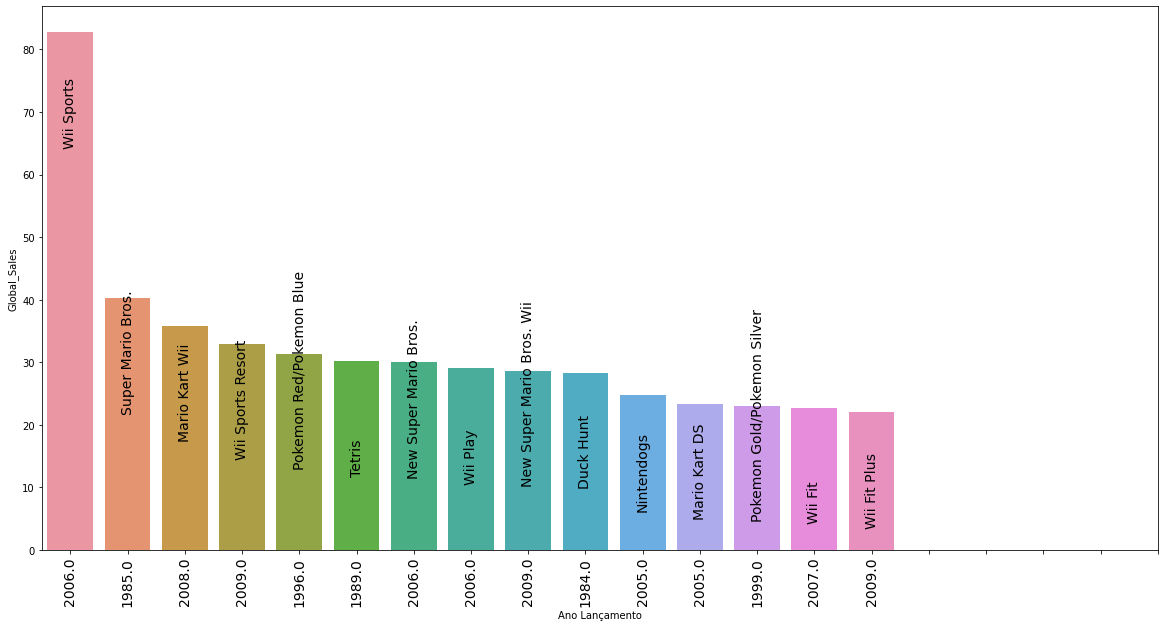

In [26]:
plt.figure(figsize=(20,10))
genre_graf_bar = sns.barplot(x='Name', y='Global_Sales', data= top_sales_game)
index = 0
for i in top_sales_game['Global_Sales'].values:
  genre_graf_bar.text(index, i - 18, name_game[index], color='#000', size= 14, rotation= 90, ha='center')
  index += 1
plt.xticks(y, top_sales_game['Year'],fontsize=14, rotation=90)
plt.xlabel('Ano Lançamento')
plt.show()

## Platform - Platform of the games release (i.e. PC,PS4, etc.)

In [27]:
df['Platform'].nunique()

31

In [28]:
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [29]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

## Qual a plataforma que vende mais jogo?

In [30]:
df.head(1)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


In [31]:
df_platform = df.groupby(['Platform'])['Global_Sales'].sum()

In [32]:
df_platform

Platform
2600      97.08
3DO        0.10
3DS      247.46
DC        15.97
DS       822.49
GB       255.45
GBA      318.50
GC       199.36
GEN       28.36
GG         0.04
N64      218.88
NES      251.07
NG         1.44
PC       258.82
PCFX       0.03
PS       730.66
PS2     1255.64
PS3      957.84
PS4      278.10
PSP      296.28
PSV       61.93
SAT       33.59
SCD        1.87
SNES     200.05
TG16       0.16
WS         1.42
Wii      926.71
WiiU      81.86
X360     979.96
XB       258.26
XOne     141.06
Name: Global_Sales, dtype: float64

In [33]:
df_platform = df_platform.reset_index()

In [34]:
df_platform = df_platform.sort_values(by=['Global_Sales'], ascending=False)

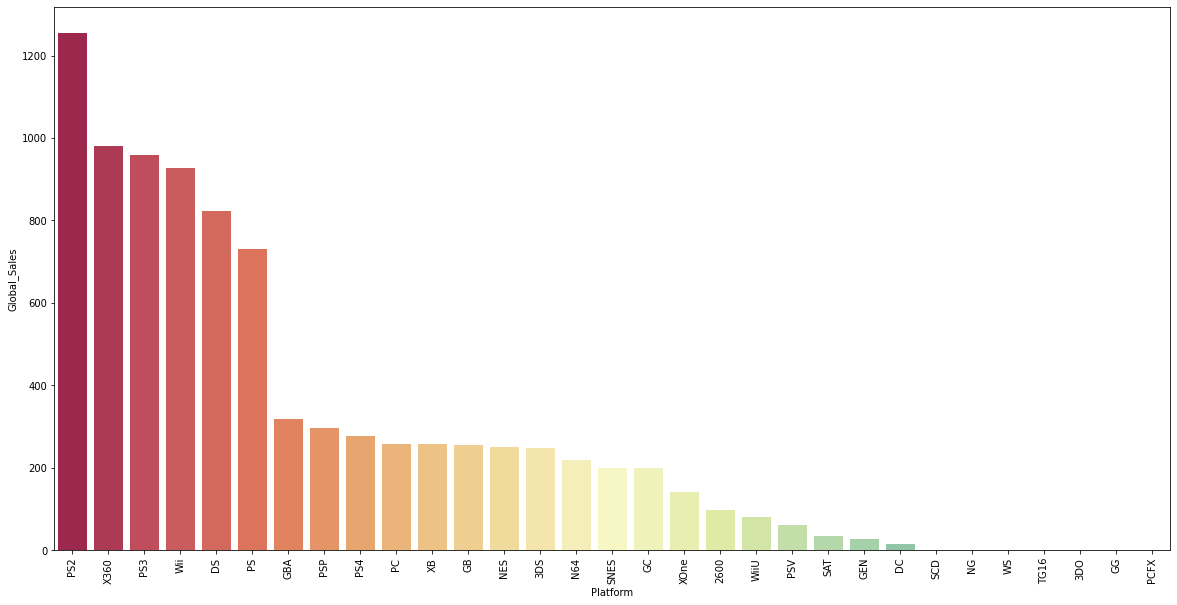

In [35]:
plt.figure(figsize=(20,10));
sns.barplot(x='Platform', y='Global_Sales', data= df_platform, palette='Spectral');
plt.xticks(rotation=90);

## Year - Year of the game's release

In [36]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [37]:
df.fillna(-1, inplace=True)

In [38]:
df['Year'] = df['Year'].astype('int64')

In [39]:
df['Year'].dtypes

dtype('int64')

## Jogos lançados por ano

In [40]:
df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False)

Year
 2009    1431
 2008    1428
 2010    1259
 2007    1202
 2011    1139
 2006    1008
 2005     941
 2002     829
 2003     775
 2004     763
 2012     657
 2015     614
 2014     582
 2013     546
 2001     482
 1998     379
 2000     349
 2016     344
 1999     338
 1997     289
-1        271
 1996     263
 1995     219
 1994     121
 1993      60
 1981      46
 1992      43
 1991      41
 1982      36
 1986      21
 1989      17
 1983      17
 1990      16
 1987      16
 1988      15
 1985      14
 1984      14
 1980       9
 2017       3
 2020       1
Name: Name, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text major ticklabel objects>)

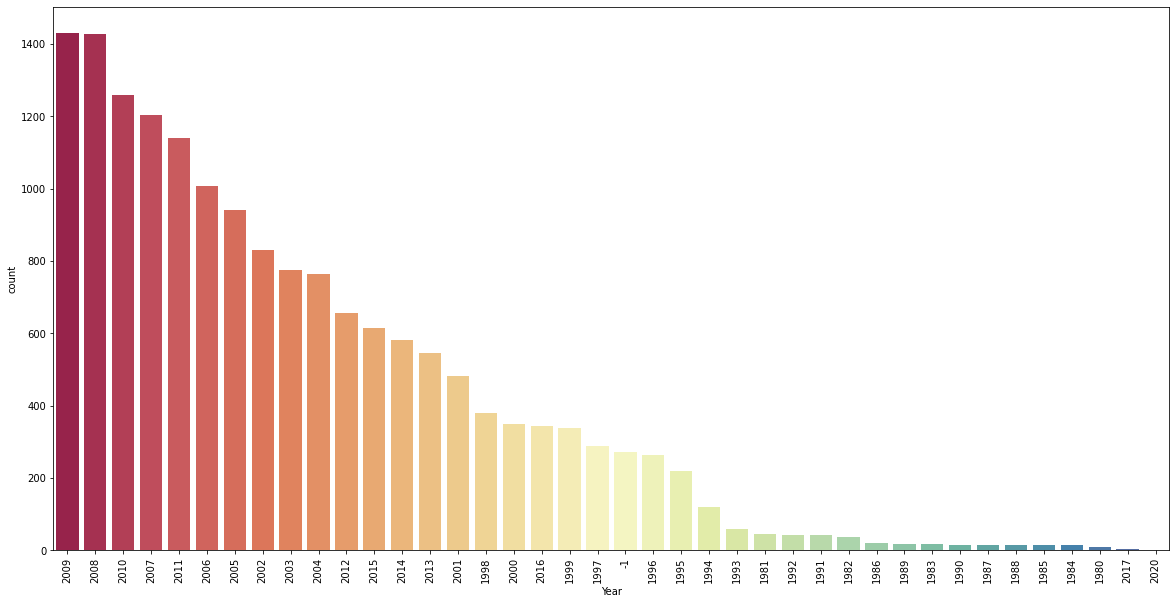

In [41]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Year', order=df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index, palette='Spectral')
plt.xticks(rotation=90)

## Genre - Genre of the game

In [42]:
df['Genre'].nunique()

12

In [43]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [44]:
df['Genre'].value_counts(ascending=False)

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

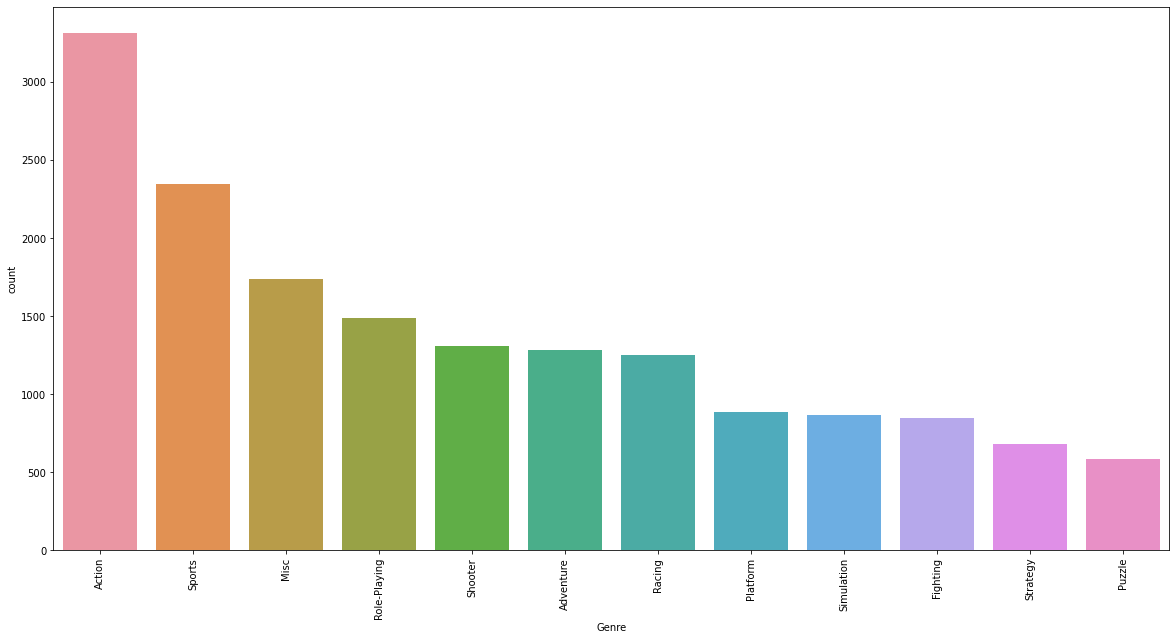

In [45]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Genre', order=df['Genre'].value_counts().index)
plt.xticks(rotation=90)


## Qual o gênero de jogo foi mais lançado por ano

In [46]:
from os import name
max_year_df = df.groupby(['Year', 'Genre']).size().reset_index(name='count')

In [47]:
max_year_idx = max_year_df.groupby(['Year'])['count'].transform(max)== max_year_df['count']

In [48]:
max_year_idx.head()

0     True
1    False
2    False
3    False
4    False
Name: count, dtype: bool

In [49]:
max_year_genre = max_year_df[max_year_idx].reset_index(drop=True)

In [50]:
max_year_genre

,Year,Genre,count
0,-1,Action,63
1,1980,Misc,4
2,1981,Action,25
3,1982,Action,18
4,1983,Action,7
5,1984,Puzzle,3
6,1984,Racing,3
7,1984,Shooter,3
8,1985,Platform,4
9,1985,Puzzle,4


In [51]:
max_year_genre = max_year_genre.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)

Filtrando para pegar somente os gêneros dos filmes mais vendidos por ano

In [52]:
max_year_genre.head(10)

,Year,Genre,count
0,-1,Action,63
1,1980,Misc,4
2,1981,Action,25
3,1982,Action,18
4,1983,Action,7
5,1984,Shooter,3
6,1985,Puzzle,4
7,1986,Platform,6
8,1987,Sports,4
9,1988,Platform,4


In [53]:
genre = max_year_genre['Genre'].values

In [54]:
genre

array(['Action', 'Misc', 'Action', 'Action', 'Action', 'Shooter',
       'Puzzle', 'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports',
       'Sports', 'Fighting', 'Platform', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Sports',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Role-Playing', 'Simulation'], dtype=object)

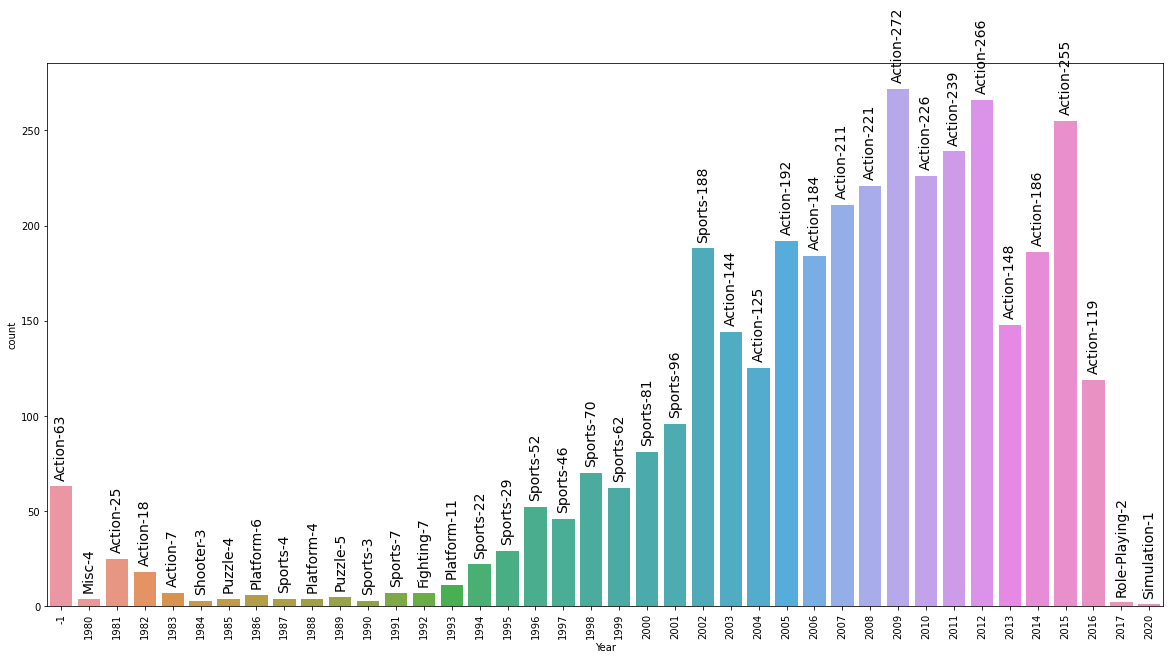

In [55]:
plt.figure(figsize=(20,10))
genre_graf_bar = sns.barplot(x='Year', y='count', data= max_year_genre)
index = 0
for i in max_year_genre['count'].values:
  genre_graf_bar.text(index, i + 5 , str(genre[index] + '-' + str(i)),color='#000', size= 14, rotation= 90, ha='center')
  index += 1
plt.xticks(rotation=90)
plt.show()

## Qual o gênero de jogo foi mais vendido por ano

In [56]:
sales_year_idx = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

In [57]:
sales_year_idx

,Year,Genre,Global_Sales
0,-1,Action,28.30
1,-1,Adventure,4.24
2,-1,Fighting,4.86
3,-1,Misc,12.34
4,-1,Platform,2.22
...,...,...,...
396,2016,Sports,14.60
397,2016,Strategy,0.50
398,2017,Action,0.01
399,2017,Role-Playing,0.04


In [58]:
sales_year = sales_year_idx.groupby(['Year'])['Global_Sales'].transform(max)== sales_year_idx['Global_Sales']

In [59]:
sales_year

0       True
1      False
2      False
3      False
4      False
       ...  
396    False
397    False
398    False
399     True
400     True
Name: Global_Sales, Length: 401, dtype: bool

In [60]:
sales_year_max = sales_year_idx[sales_year].reset_index(drop=True)

In [61]:
sales_year_max.head()

,Year,Genre,Global_Sales
0,-1,Action,28.30
1,1980,Shooter,7.07
2,1981,Action,14.84
3,1982,Puzzle,10.03
4,1983,Platform,6.93


In [62]:
genre = sales_year_max['Genre']

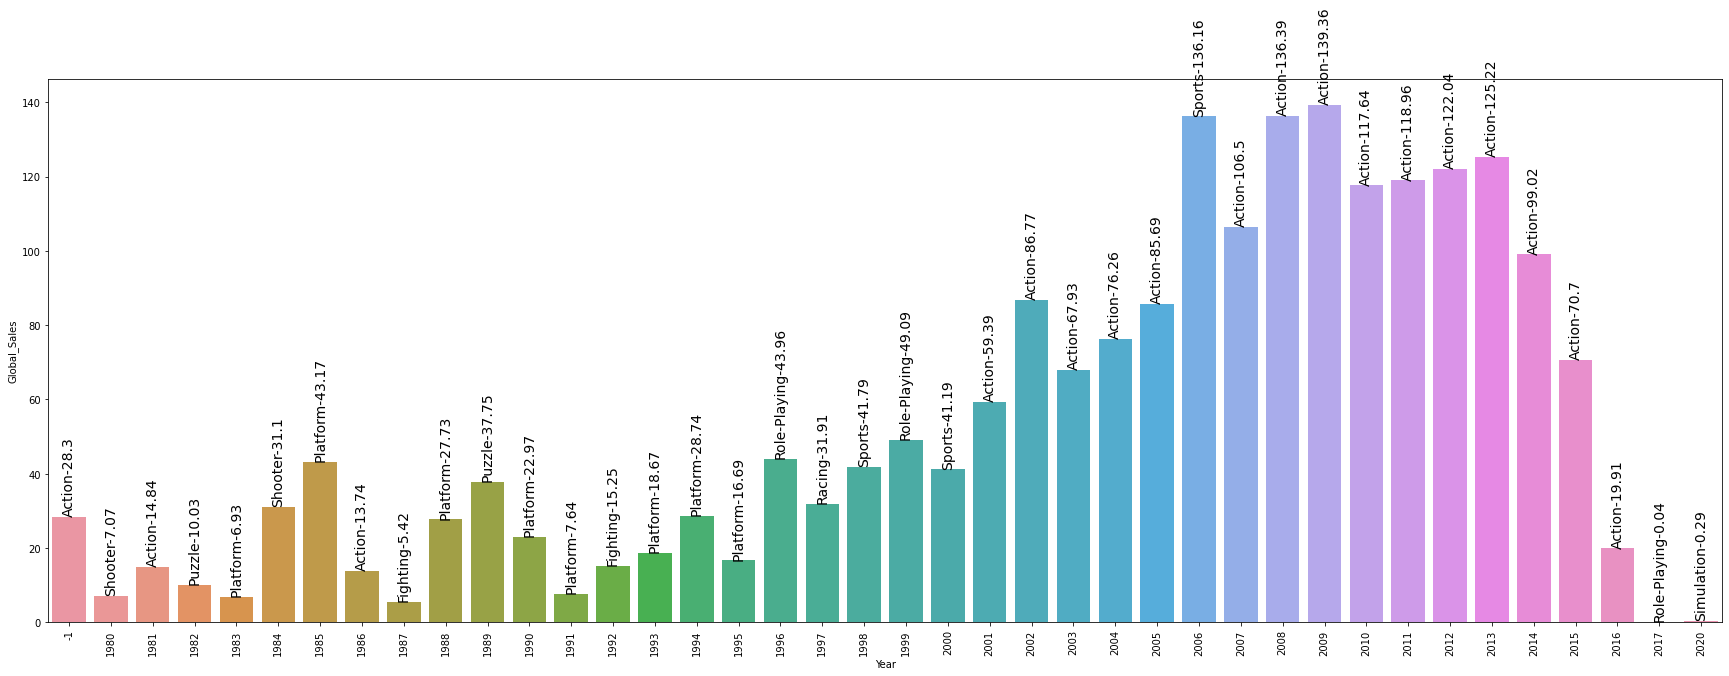

In [63]:
plt.figure(figsize=(30,10))
genre_graf_bar = sns.barplot(x='Year', y='Global_Sales', data= sales_year_max)
index = 0
for i in sales_year_max['Global_Sales'].values:
  genre_graf_bar.text(index, i + 1 , str(genre[index] + '-' + str(round(i,2))),color='#000', size= 14, rotation= 90, ha='center')
  index += 1
plt.xticks(rotation=90)
plt.show()

## Qual gênero de jogo tem o valor mais alto(globalmente)

In [64]:
df_genre = df.groupby(by=['Genre'])['Global_Sales'].sum()

In [65]:
df_genre

Genre
Action          1751.18
Adventure        239.04
Fighting         448.91
Misc             809.96
Platform         831.37
Puzzle           244.95
Racing           732.04
Role-Playing     927.37
Shooter         1037.37
Simulation       392.20
Sports          1330.93
Strategy         175.12
Name: Global_Sales, dtype: float64

In [66]:
df_genre = df_genre.reset_index()

In [67]:
df_genre

,Genre,Global_Sales
0,Action,1751.18
1,Adventure,239.04
2,Fighting,448.91
3,Misc,809.96
4,Platform,831.37
5,Puzzle,244.95
6,Racing,732.04
7,Role-Playing,927.37
8,Shooter,1037.37
9,Simulation,392.20


In [68]:
df_genre = df_genre.sort_values(by='Global_Sales', ascending=False)

In [69]:
df_genre.head()

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37


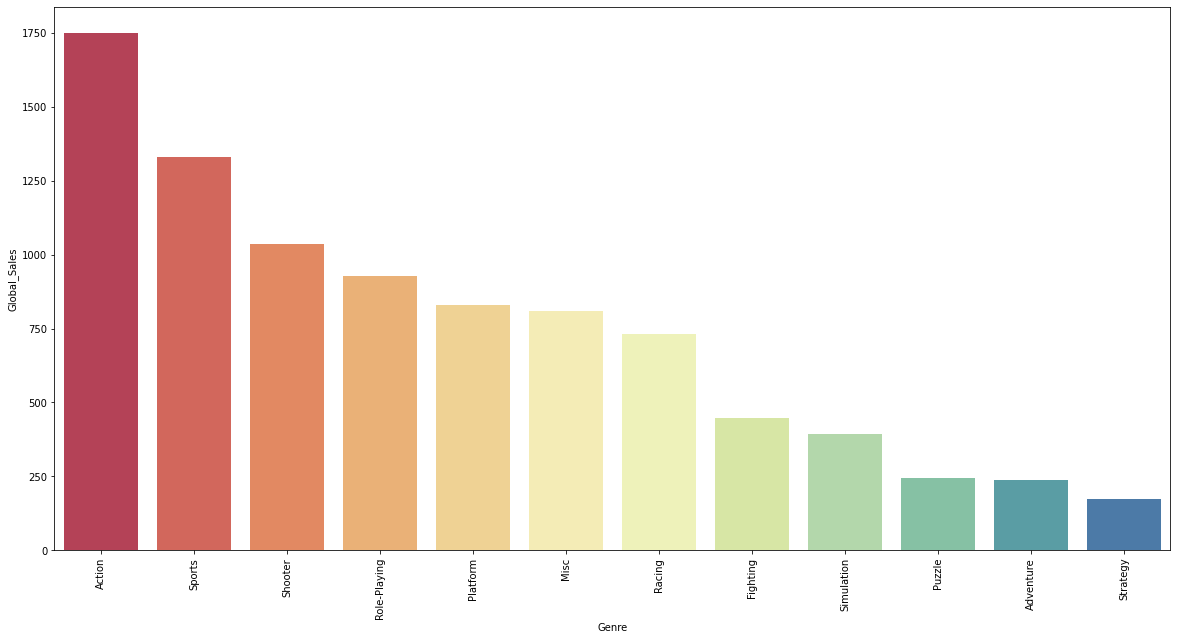

In [70]:
plt.figure(figsize=(20,10));
sns.barplot(x='Genre', y='Global_Sales', data= df_genre, palette='Spectral');
plt.xticks(rotation=90);

## Dentro dos três principais anos quais foram os gêneros de jogos mais vendidos.


In [71]:
df['Year'].value_counts().iloc[:3].index

Int64Index([2009, 2008, 2010], dtype='int64')

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

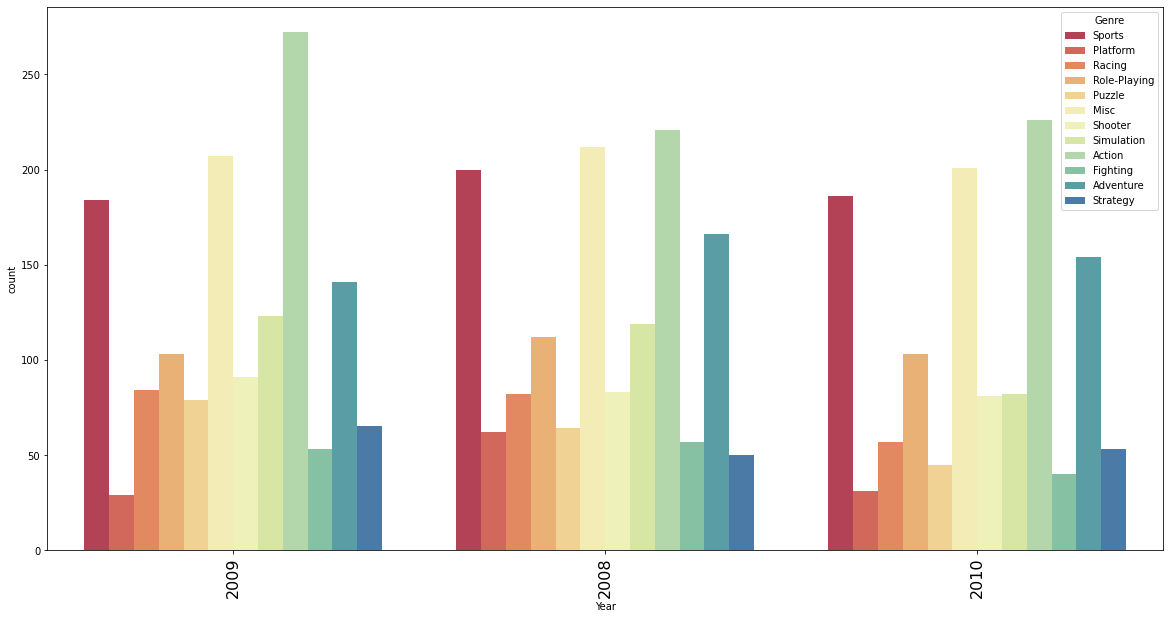

In [72]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Year', hue='Genre', order=df['Year'].value_counts().iloc[:3].index, palette='Spectral')
plt.xticks(size=16, rotation=90)

## Publisher - Publisher of the game

In [73]:
df['Publisher'].nunique()

579

In [74]:
df['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       -1, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',
 

## Quais as principais vendas globais por editor(publisher)

In [75]:
sales_publisher = df[['Publisher','Global_Sales']]

In [76]:
sales_publisher

,Publisher,Global_Sales
0,Nintendo,82.74
1,Nintendo,40.24
2,Nintendo,35.82
3,Nintendo,33.00
4,Nintendo,31.37
...,...,...
16593,Kemco,0.01
16594,Infogrames,0.01
16595,Activision,0.01
16596,7G//AMES,0.01


In [77]:
sales_publisher = sales_publisher.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)

In [78]:
sales_publisher

Publisher
Nintendo                                  1786.56
Electronic Arts                           1110.32
Activision                                 727.46
Sony Computer Entertainment                607.50
Ubisoft                                    474.72
Take-Two Interactive                       399.54
THQ                                        340.77
Konami Digital Entertainment               283.64
Sega                                       272.99
Namco Bandai Games                         254.09
Microsoft Game Studios                     245.79
Capcom                                     200.89
Atari                                      157.22
Warner Bros. Interactive Entertainment     153.89
Square Enix                                145.18
Disney Interactive Studios                 119.96
Eidos Interactive                           98.98
LucasArts                                   87.34
Bethesda Softworks                          82.14
Midway Games                            

In [79]:
sales_publisher = sales_publisher.reset_index()

In [80]:
sales_publisher 

,Publisher,Global_Sales
0,Nintendo,1786.56
1,Electronic Arts,1110.32
2,Activision,727.46
3,Sony Computer Entertainment,607.50
4,Ubisoft,474.72
5,Take-Two Interactive,399.54
6,THQ,340.77
7,Konami Digital Entertainment,283.64
8,Sega,272.99
9,Namco Bandai Games,254.09


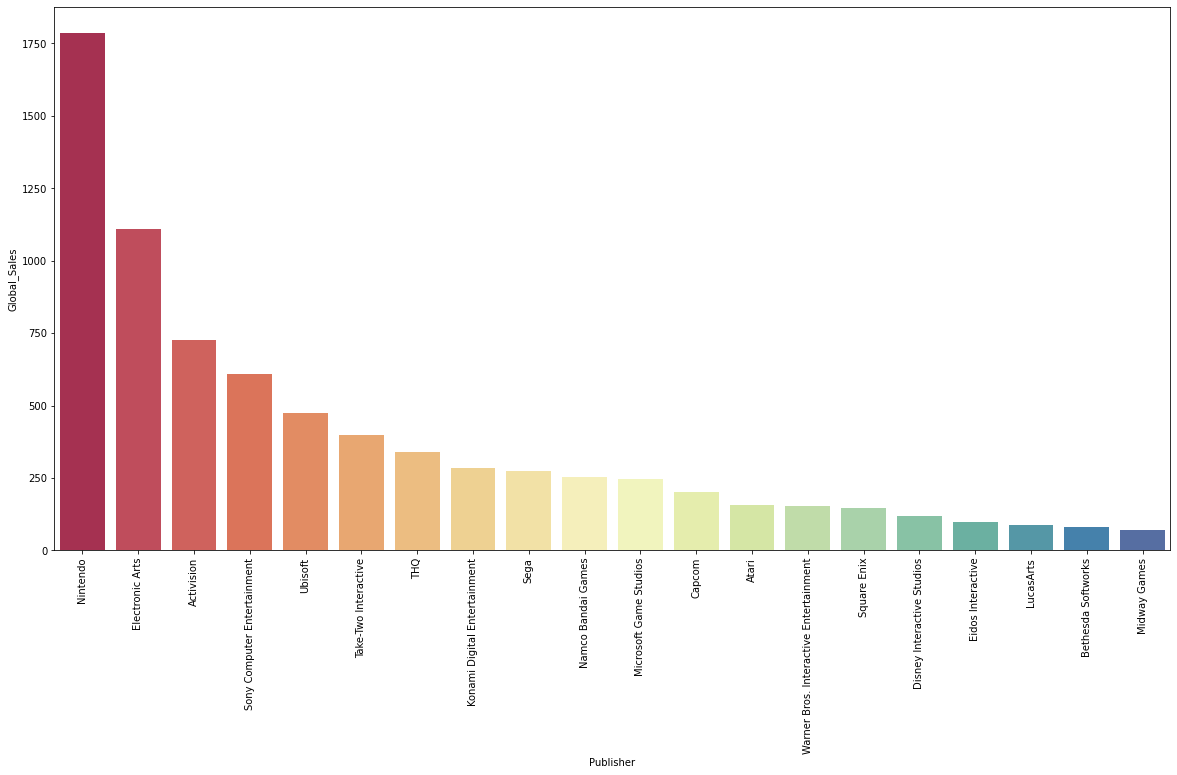

In [81]:
plt.figure(figsize=(20,10));
sns.barplot(x='Publisher', y='Global_Sales', data=sales_publisher, palette='Spectral');
plt.xticks(rotation=90);

## NA_Sales - Sales in North America (in millions)

In [82]:
df['NA_Sales'].describe()

count    16598.000000
mean         0.264667
std          0.816683
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.490000
Name: NA_Sales, dtype: float64

In [83]:
df['NA_Sales'].sort_values(ascending=False)

0        41.49
1        29.08
9        26.93
5        23.20
2        15.85
         ...  
8808      0.00
8799      0.00
8795      0.00
13576     0.00
5816      0.00
Name: NA_Sales, Length: 16598, dtype: float64

In [84]:
df[df['NA_Sales']== 0]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
214,215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,Capcom,0.0,0.00,4.87,0.00,4.87
338,339,Friend Collection,DS,2009,Misc,Nintendo,0.0,0.00,3.67,0.00,3.67
383,384,Monster Hunter 4,3DS,2013,Role-Playing,Capcom,0.0,0.00,3.44,0.00,3.44
402,403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,Nintendo,0.0,0.99,2.32,0.02,3.33
426,427,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,Enix Corporation,0.0,0.00,3.19,0.00,3.19
...,...,...,...,...,...,...,...,...,...,...,...
16587,16590,Mezase!! Tsuri Master DS,DS,2009,Sports,Hudson Soft,0.0,0.00,0.01,0.00,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016,Action,dramatic create,0.0,0.00,0.01,0.00,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007,Role-Playing,Falcom Corporation,0.0,0.00,0.01,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.0,0.00,0.00,0.00,0.01


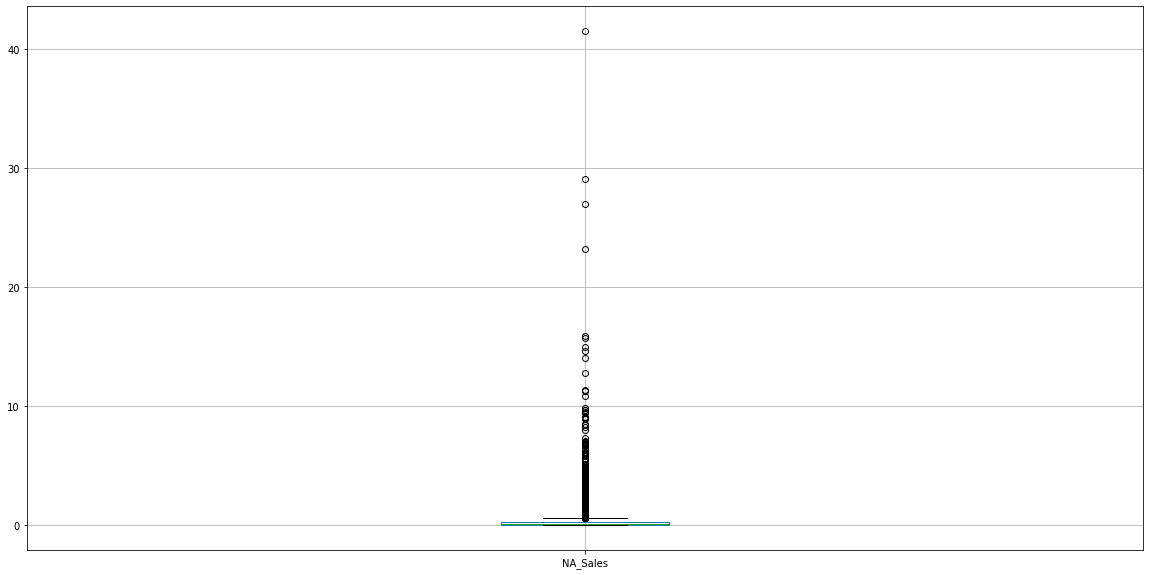

In [85]:
plt.figure(figsize=(20,10))
df.boxplot('NA_Sales')
plt.show()

In [86]:
df_nasales_year = df.groupby(by=['Year'])['NA_Sales'].sum()

In [87]:
df_nasales_year.head()

Year
-1       59.52
 1980    10.59
 1981    33.40
 1982    26.92
 1983     7.76
Name: NA_Sales, dtype: float64

In [88]:
df_nasales_year = df_nasales_year.reset_index() # 

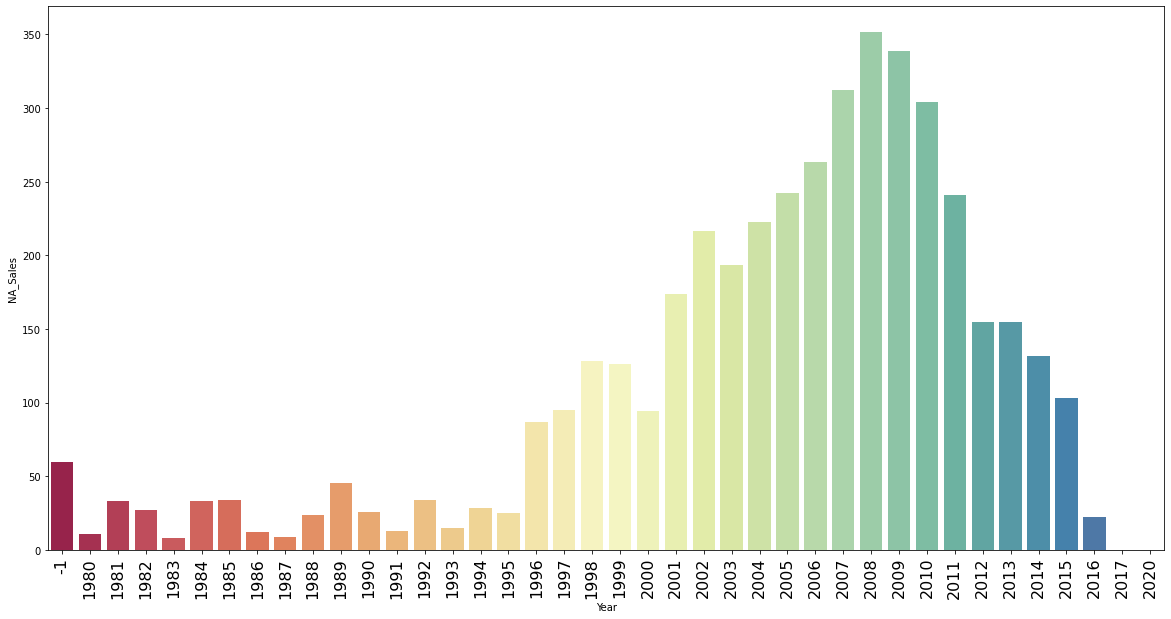

In [89]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='NA_Sales', data=df_nasales_year,palette='Spectral' )
plt.xticks(size=16, rotation=90);

## EU_Sales - Sales in Europe (in millions)

In [90]:
df['EU_Sales'].describe()

count    16598.000000
mean         0.146652
std          0.505351
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         29.020000
Name: EU_Sales, dtype: float64

In [91]:
df['EU_Sales'].sort_values(ascending=False)

0        29.02
2        12.88
3        11.01
10       11.00
16        9.27
         ...  
12566     0.00
12565     0.00
12564     0.00
12563     0.00
16597     0.00
Name: EU_Sales, Length: 16598, dtype: float64

consultando o nome do jogo que mais vendeu

In [92]:
df[df['EU_Sales']== 29.02]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


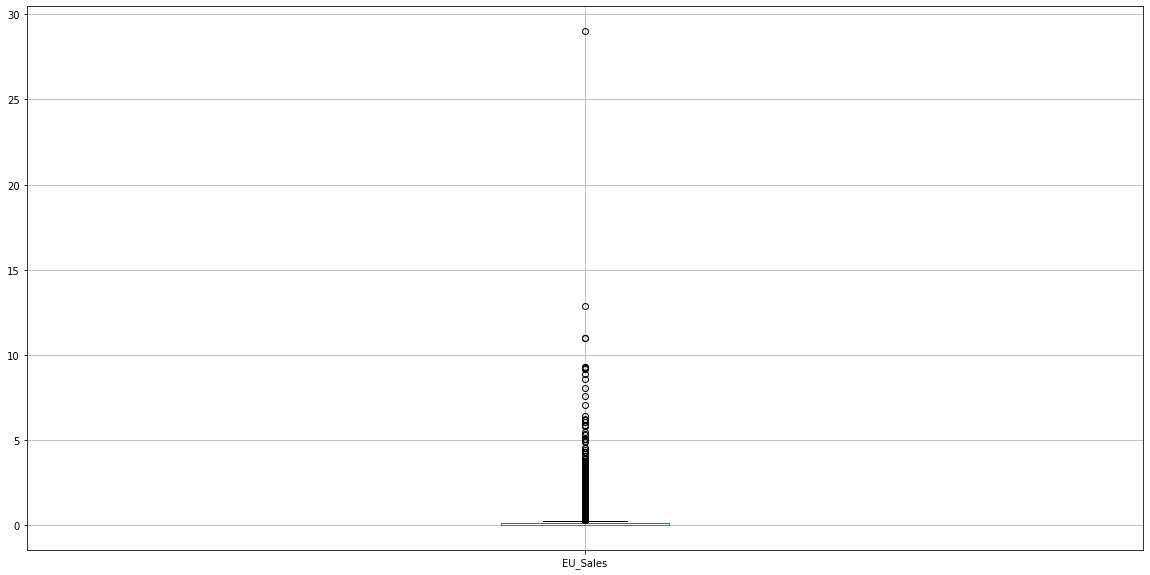

In [93]:
plt.figure(figsize=(20,10))
df.boxplot('EU_Sales')
plt.show()

In [94]:
df_eusales_year = df.groupby(by=['Year'])['EU_Sales'].sum()

In [95]:
df_eusales_year

Year
-1        25.01
 1980      0.67
 1981      1.96
 1982      1.65
 1983      0.80
 1984      2.10
 1985      4.74
 1986      2.84
 1987      1.41
 1988      6.59
 1989      8.44
 1990      7.63
 1991      3.95
 1992     11.71
 1993      4.65
 1994     14.88
 1995     14.90
 1996     47.26
 1997     48.32
 1998     66.90
 1999     62.67
 2000     52.75
 2001     94.89
 2002    109.74
 2003    103.81
 2004    107.32
 2005    121.94
 2006    129.24
 2007    160.50
 2008    184.40
 2009    191.59
 2010    176.73
 2011    167.44
 2012    118.78
 2013    125.80
 2014    125.65
 2015     97.71
 2016     26.76
 2017      0.00
 2020      0.00
Name: EU_Sales, dtype: float64

In [96]:
df_eusales_year = df_eusales_year.reset_index()

In [97]:
df_eusales_year.head()

,Year,EU_Sales
0,-1,25.01
1,1980,0.67
2,1981,1.96
3,1982,1.65
4,1983,0.80


## Visualizando as vendas de jogos na Europa por ano.

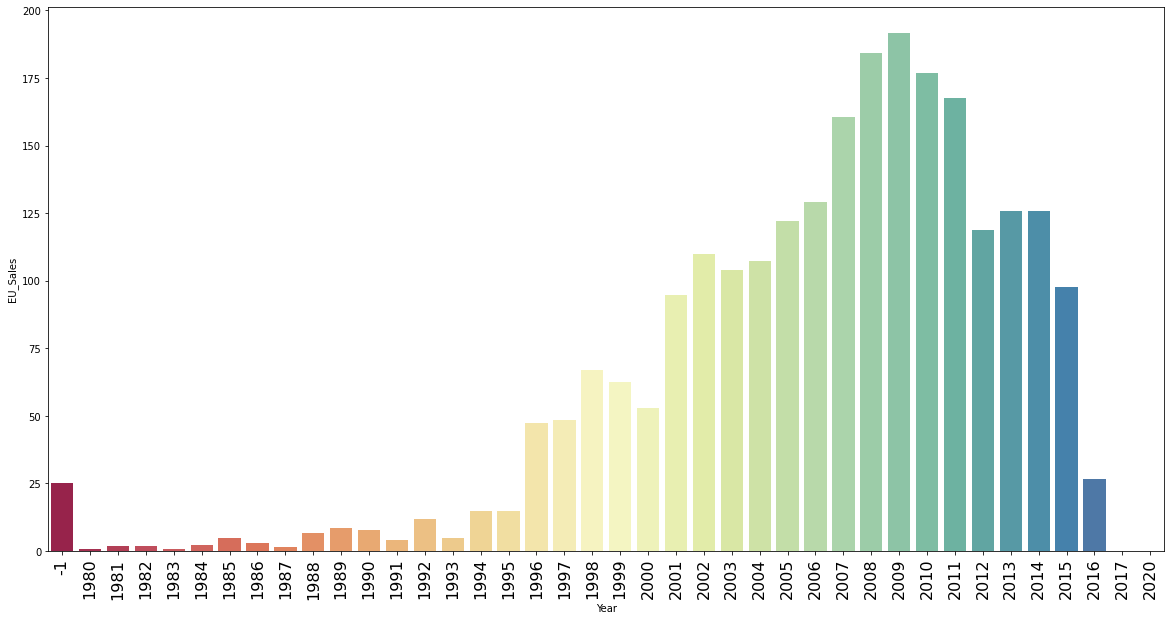

In [98]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='EU_Sales', data=df_eusales_year,palette='Spectral' )
plt.xticks(size=16, rotation=90);

## JP_Sales - Sales in Japan (in millions)

In [99]:
df['JP_Sales'].describe()

count    16598.000000
mean         0.077782
std          0.309291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: JP_Sales, dtype: float64

In [100]:
df['JP_Sales'].sort_values(ascending=False)

4        10.22
12        7.20
1         6.81
6         6.50
20        6.04
         ...  
7166      0.00
7167      0.00
7168      0.00
7172      0.00
16597     0.00
Name: JP_Sales, Length: 16598, dtype: float64

Qual o filme mais vendido no japão.

In [101]:
df[df['JP_Sales']== 10.22]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.0,31.37


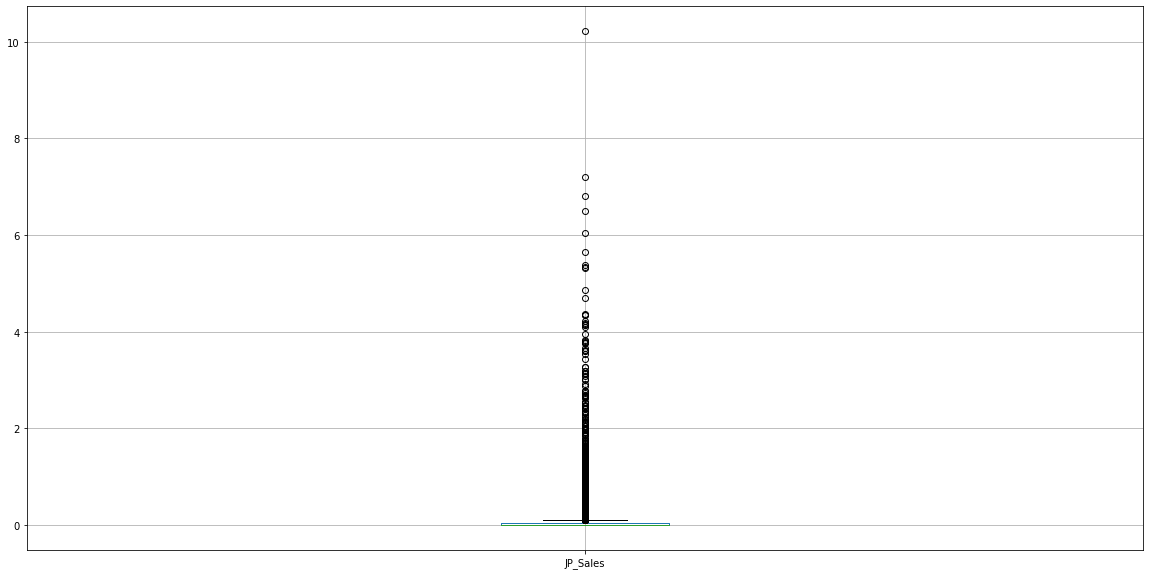

In [102]:
plt.figure(figsize=(20,10))
df.boxplot('JP_Sales')
plt.show()

In [103]:
df_jpsales_year = df.groupby(by=['Year'])['JP_Sales'].sum()

In [104]:
df_jpsales_year = df_jpsales_year.reset_index()

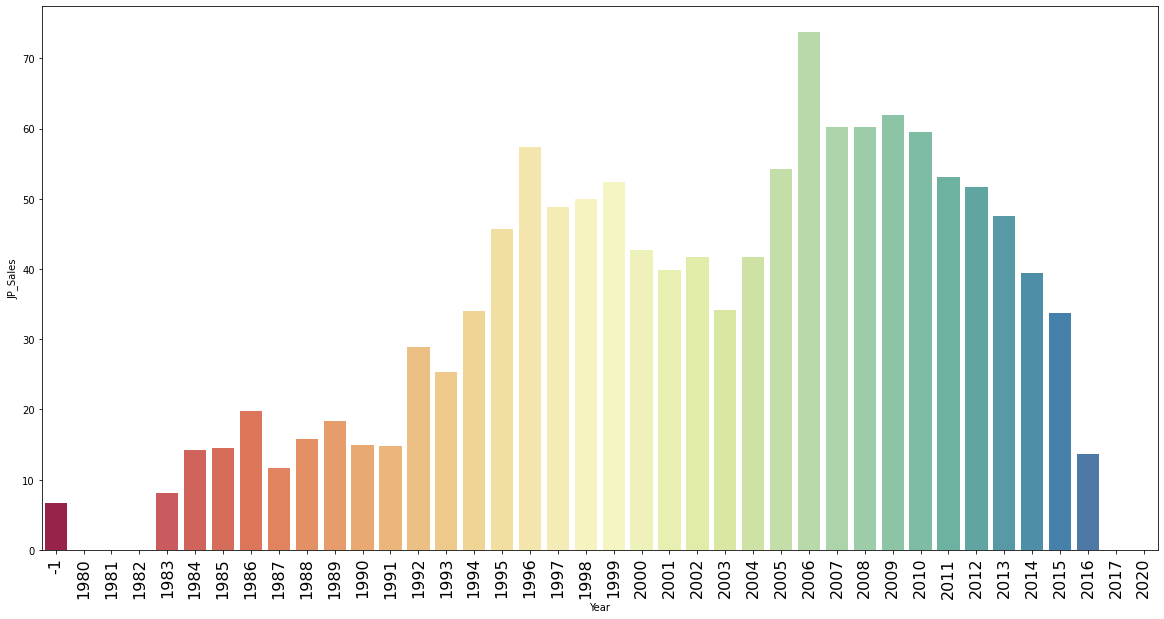

In [105]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='JP_Sales', data=df_jpsales_year,palette='Spectral' )
plt.xticks(size=16, rotation=90);

## Other_Sales - Sales in the rest of the world (in millions)

In [106]:
df['Other_Sales'].describe()

count    16598.000000
mean         0.048063
std          0.188588
min          0.000000
25%          0.000000
50%          0.010000
75%          0.040000
max         10.570000
Name: Other_Sales, dtype: float64

In [107]:
df['Other_Sales'].sort_values(ascending=False)

17       10.57
0         8.46
47        7.53
16        4.14
2         3.31
         ...  
12050     0.00
12049     0.00
12048     0.00
4414      0.00
16597     0.00
Name: Other_Sales, Length: 16598, dtype: float64

Vendas no resto do mundo(jogo mais vendido)

In [108]:
df[df['Other_Sales']== 10.57]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81


Pegando sempre o valor máximo de other sales

In [109]:
max_other_sales = df['Other_Sales'].max()

In [110]:
df[df['Other_Sales']== max_other_sales]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.4,0.41,10.57,20.81


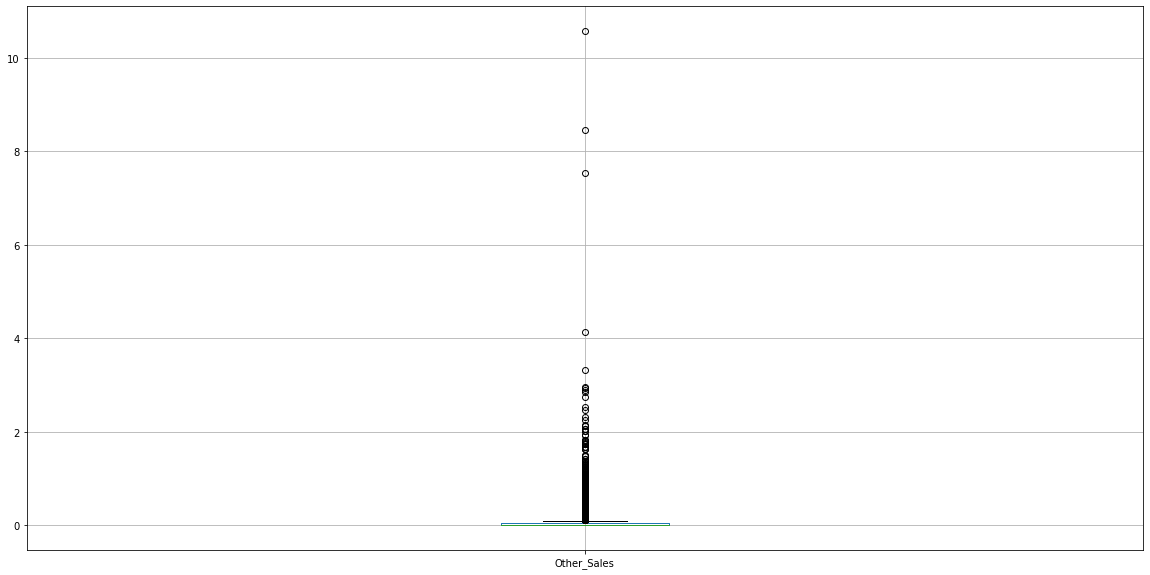

In [111]:
plt.figure(figsize=(20,10))
df.boxplot('Other_Sales')
plt.show()

In [112]:
df_othersales_year = df.groupby(by=['Year'])['Other_Sales'].sum()

In [113]:
df_othersales_year = df_othersales_year.reset_index()

<Figure size 1440x720 with 0 Axes>

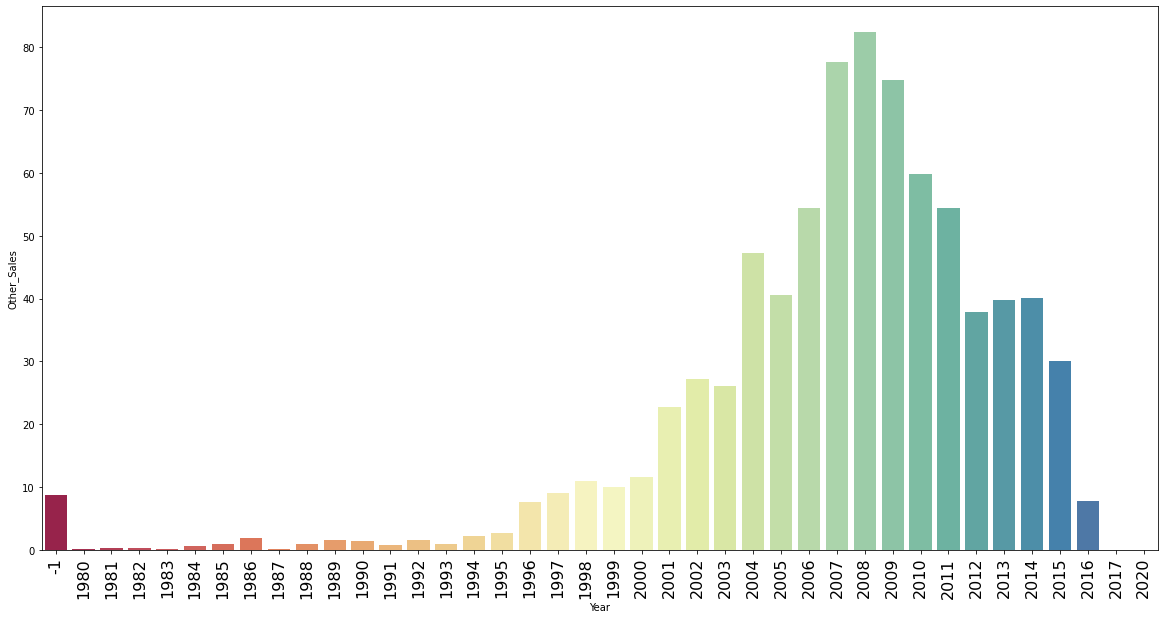

In [114]:
plt.figure(figsize=(20,10))
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Other_Sales', data=df_othersales_year, palette='Spectral' )
plt.xticks(size=16, rotation=90);



##Global_Sales - Total worldwide sales

In [115]:
df['Global_Sales'].describe()

count    16598.000000
mean         0.537441
std          1.555028
min          0.010000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.740000
Name: Global_Sales, dtype: float64

In [116]:
df['Global_Sales'].sort_values(ascending=False)

0        82.74
1        40.24
2        35.82
3        33.00
4        31.37
         ...  
16186     0.01
16187     0.01
16188     0.01
16189     0.01
16597     0.01
Name: Global_Sales, Length: 16598, dtype: float64

## Jogo mais vendido do mundo

In [117]:
df[df['Global_Sales']== 82.74]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


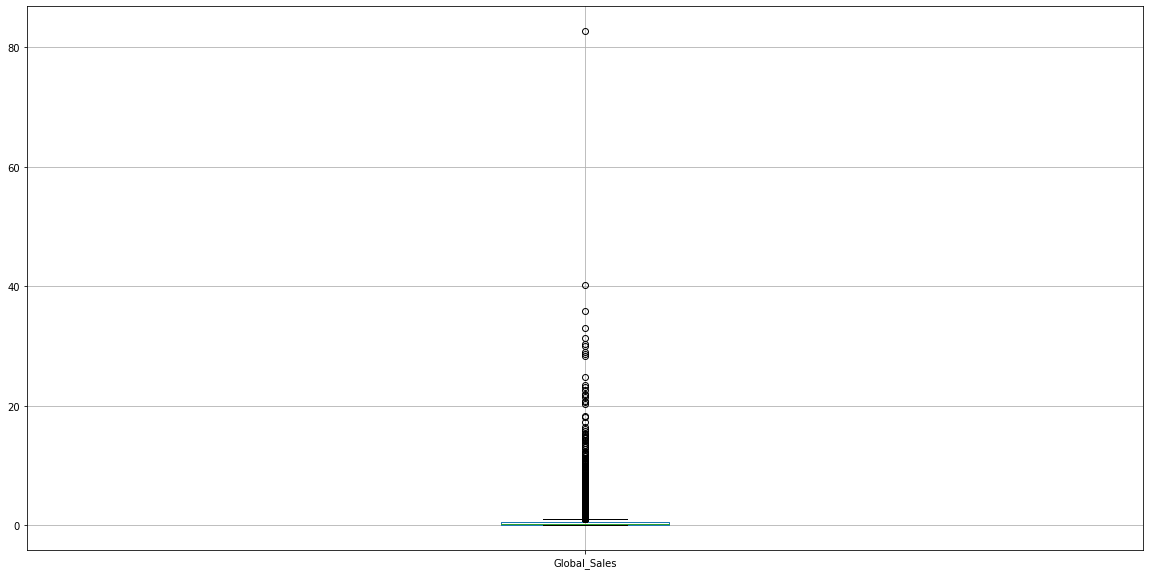

In [118]:
plt.figure(figsize=(20,10))
df.boxplot('Global_Sales')
plt.show()

In [119]:
df_globalsales_year = df.groupby(by=['Year'])['Global_Sales'].sum()

In [120]:
df_globalsales_year = df_globalsales_year.reset_index()

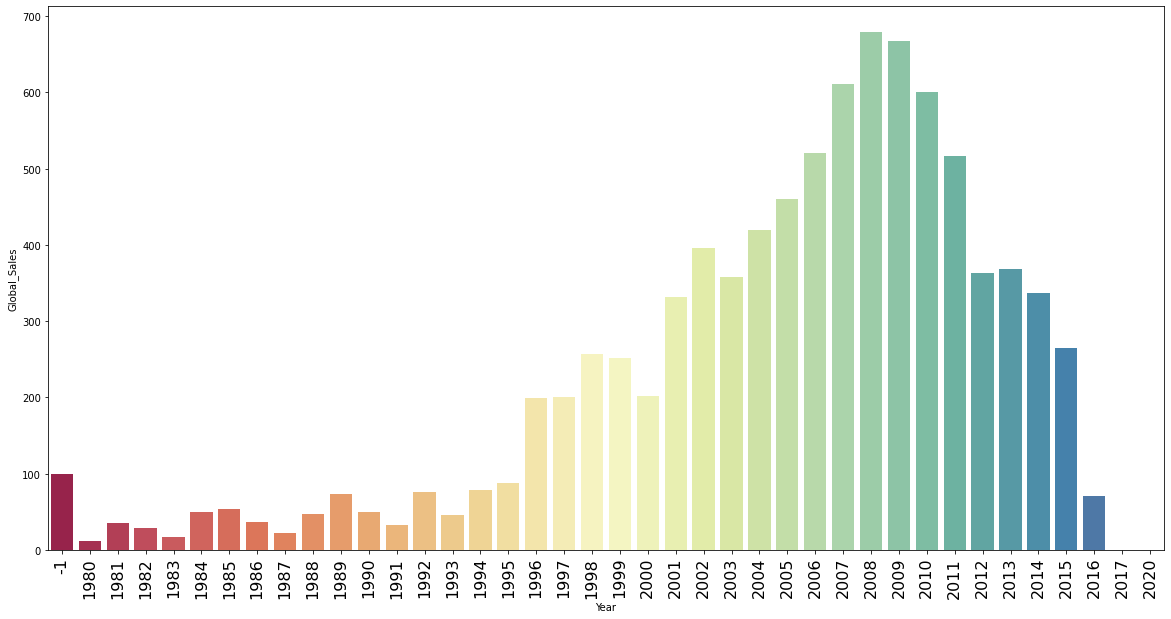

In [121]:
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Global_Sales', data=df_globalsales_year, palette='Spectral' )
plt.xticks(size=16, rotation=90);

## Receita total (sales Global) por país.

In [122]:
top_sales_country = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

In [123]:
top_sales_country.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,41.49,29.02,3.77,8.46
1,29.08,3.58,6.81,0.77
2,15.85,12.88,3.79,3.31
3,15.75,11.01,3.28,2.96
4,11.27,8.89,10.22,1.00


In [124]:
top_sales_country = top_sales_country.sum().reset_index()

In [125]:
top_sales_country

,index,0
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


In [126]:
top_sales_country = top_sales_country.rename(columns={'index': 'country', 0: 'sum of sales'})

In [127]:
top_sales_country


,country,sum of sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

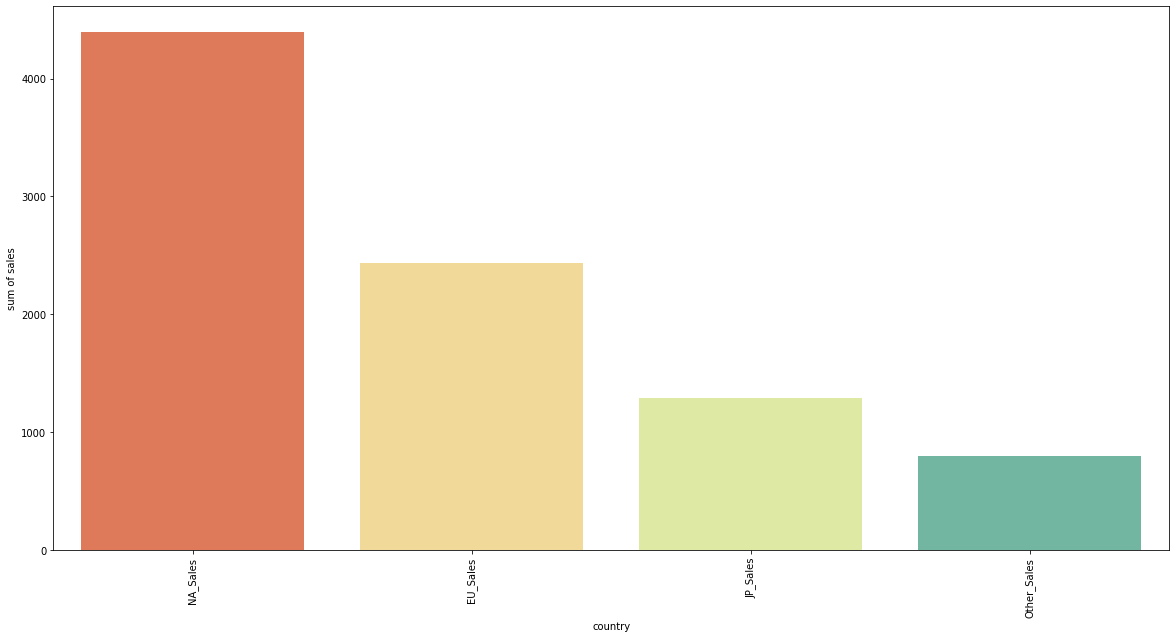

In [128]:
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='sum of sales', data=top_sales_country, palette='Spectral')
plt.xticks(rotation=90)

In [129]:
top_sales_country

,country,sum of sales
0,NA_Sales,4392.95
1,EU_Sales,2434.13
2,JP_Sales,1291.02
3,Other_Sales,797.75


In [130]:
label = top_sales_country['country']

In [131]:
label

0       NA_Sales
1       EU_Sales
2       JP_Sales
3    Other_Sales
Name: country, dtype: object

In [132]:
sum_of_sales = top_sales_country['sum of sales']

In [133]:
sum_of_sales

0    4392.95
1    2434.13
2    1291.02
3     797.75
Name: sum of sales, dtype: float64

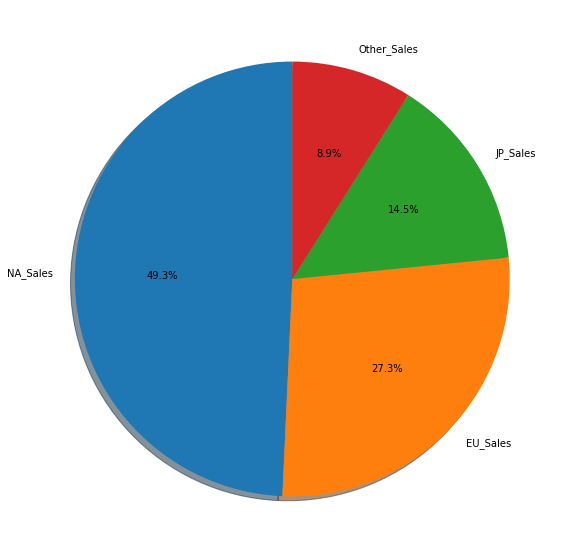

In [134]:
plt.figure(figsize=(20,10));
plt.pie(sum_of_sales, labels=label, autopct='%1.1f%%', shadow=True, startangle=90);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

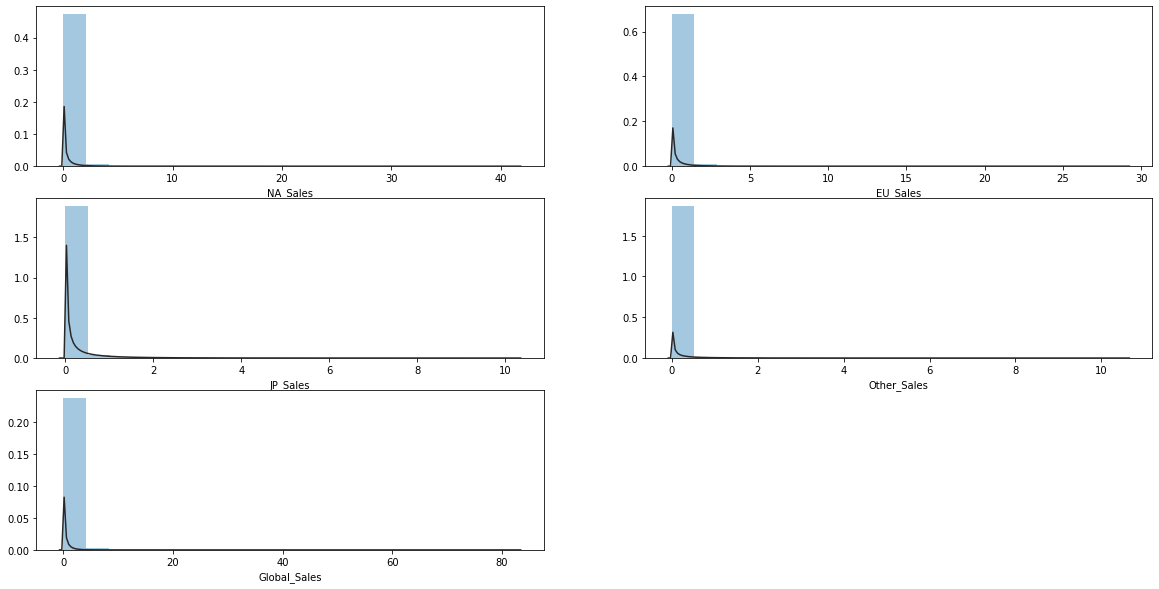

In [135]:
plt.figure(figsize=(20,10))
columns_country = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, j in enumerate(columns_country):
  plt.subplot(3,2,i+1)
  sns.distplot(df[j], bins=20, kde=False, fit=stats.gamma)

In [136]:
df_hist_transform_log = df.copy()

In [137]:
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.NA_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.EU_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.JP_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Other_Sales != 0]
df_hist_transform_log = df_hist_transform_log[df_hist_transform_log.Global_Sales != 0]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

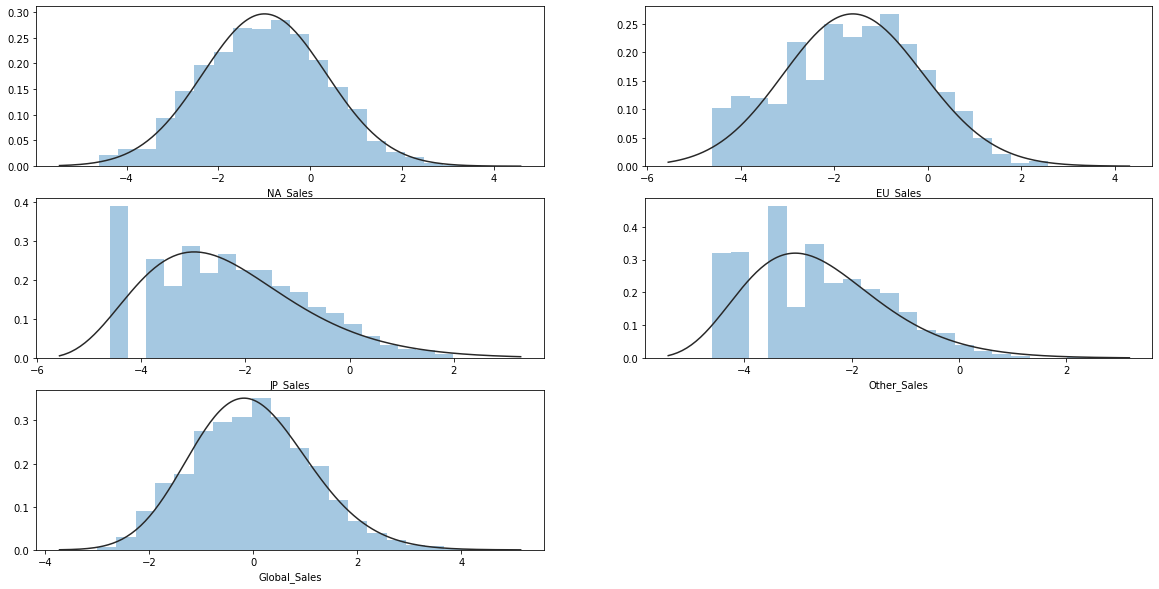

In [138]:
plt.figure(figsize=(20,10))
columns_country = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for i, j in enumerate(columns_country):
  plt.subplot(3,2,i+1)
  sns.distplot(np.log(df_hist_transform_log[j]), bins=20, kde=False, fit=stats.gamma);

## Correlação entre feautures

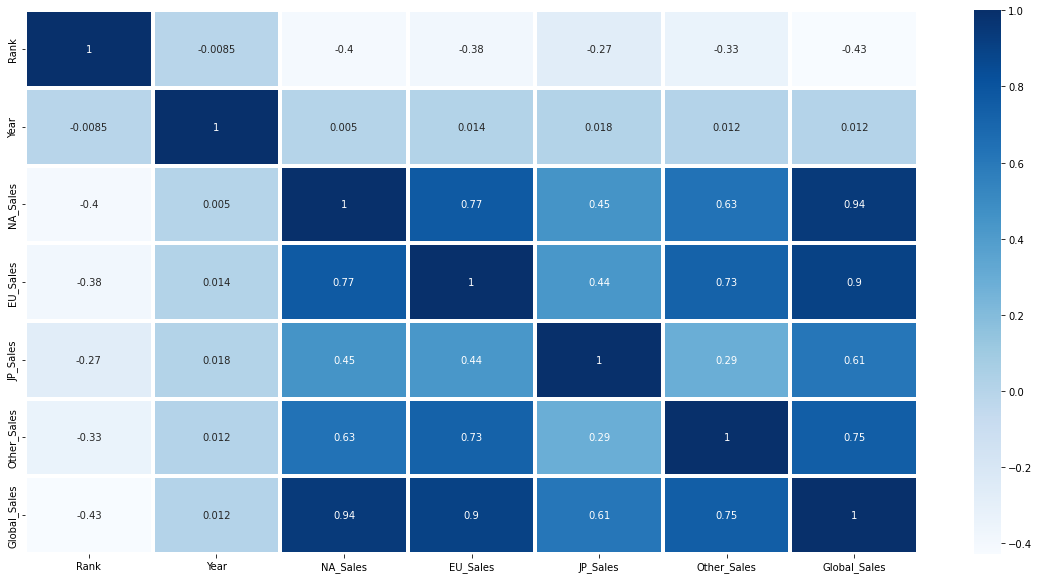

In [139]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, linewidth=3 )